In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp # for reference

import autograd.numpy as np
from neuralsolver import NNSolver

# Define ODE problem

In [2]:
def f(t, y):
    '''
        dy/dt = f(t, y)
        This is f() function on the right
    '''    
    
    return [998*y[0] + 1998*y[1], -999*y[0] - 1999*y[1]]

t = np.linspace(0, 2.0, 11).reshape(-1,1) # training points
y0_list = [2, -1]

# Reference solution

In [3]:
sol = solve_ivp(f, [t.min(), t.max()], y0_list, method='Radau', rtol=1e-5)

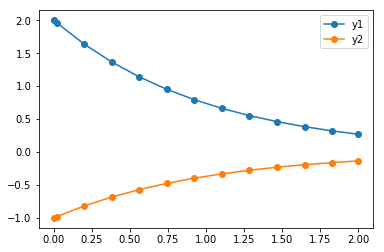

In [4]:
plt.plot(sol.t, sol.y[0], marker='o', label='y1')
plt.plot(sol.t, sol.y[1], marker='o', label='y2')
plt.legend()

# Neural net training

In [5]:
nn = NNSolver(f, t, y0_list, n_hidden=5)
nn

Neural ODE Solver 
Number of equations:       2 
Initial condition y0:      [2, -1] 
Numnber of hidden units:   5 
Number of training points: 11 

In [6]:
nn.reset_weights()
%time nn.train(maxiter=1000, iprint=100)

iteration: 0 loss:  2306089.15899
iteration: 100 loss:  0.0297068737734
iteration: 200 loss:  0.0020136437544
iteration: 300 loss:  0.00121718738475
iteration: 400 loss:  0.000922494280996
iteration: 500 loss:  0.000597198211759
iteration: 600 loss:  0.000314026362643
iteration: 700 loss:  0.000237326139503
iteration: 800 loss:  0.000219827499623
iteration: 900 loss:  0.000206118538872
         Current function value: 0.000195
         Iterations: 1000
         Function evaluations: 1154
         Gradient evaluations: 1154
CPU times: user 6.43 s, sys: 44.6 ms, total: 6.48 s
Wall time: 6.5 s


# Verifying training set

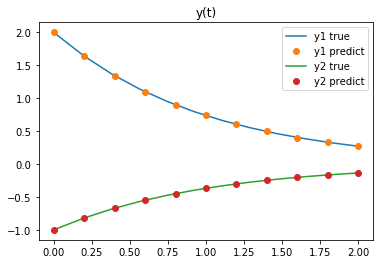

In [7]:
y_pred_list, dydt_pred_list = nn.predict()

plt.plot(sol.t, sol.y[0], label='y1 true')
plt.plot(t, y_pred_list[0], 'o', label='y1 predict')
plt.plot(sol.t, sol.y[1], label='y2 true')
plt.plot(t, y_pred_list[1], 'o', label='y2 predict')

plt.legend()
plt.title('y(t)')

# Out-of sample prediction

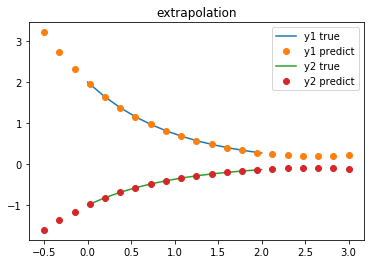

In [8]:
t_test = np.linspace(-0.5, 3.0, 21).reshape(-1,1)
y_pred_list, dydt_pred_list = nn.predict(t=t_test)

plt.plot(sol.t, sol.y[0], label='y1 true')
plt.plot(t_test, y_pred_list[0], 'o', label='y1 predict')
plt.plot(sol.t, sol.y[1], label='y2 true')
plt.plot(t_test, y_pred_list[1], 'o', label='y2 predict')

plt.legend()
plt.title('extrapolation')